In [1]:
import pandas as pd
import pandas as pd
from tensorflow.keras.optimizers import Adam

import tensorflow as tf

In [2]:
dataset = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

# Read the dataset into a Pandas DataFrame
TITANIC = pd.read_csv(dataset)

In [3]:
import sys
sys.path.append('..')
from xDL.models.NATT import NATT

In [4]:
model = NATT(
    "survived ~  -1 + MLP(fare) +  Transformer(age, encoding=int, n_bins=20):Transformer(sex):Transformer(deck):Transformer(embark_town)", 
    data=TITANIC, 
    feature_dropout=0.0001,
    binning_task="regression"
    )

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), tf.keras.metrics.AUC(name="auc")], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=100, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/100
1/1 [==============================] - 18s 18s/step - loss: 0.7797 - output_loss: 0.7797 - output_PR AUC: 0.3590 - output_auc: 0.4632 - val_loss: 0.6777 - val_output_loss: 0.6777 - val_output_PR AUC: 0.6736 - val_output_auc: 0.6712
Epoch 2/100
1/1 [==============================] - 0s 239ms/step - loss: 0.6832 - output_loss: 0.6832 - output_PR AUC: 0.4161 - output_auc: 0.5550 - val_loss: 0.6237 - val_output_loss: 0.6237 - val_output_PR AUC: 0.6886 - val_output_auc: 0.7265
Epoch 3/100
1/1 [==============================] - 0s 316ms/step - loss: 0.6475 - output_loss: 0.6475 - output_PR AUC: 0.5280 - output_auc: 0.6370 - val_loss: 0.6462 - val_output_loss: 0.6462 - val_output_PR AUC: 0.7136 - val_output_auc: 0.8105
Epoch 4/100
1/1 [==============================] - 0s 330ms/step - loss: 0.6287 - output_loss: 0.6287 - output_PR AUC: 0.5680 - output_auc: 0.6965 - val_loss: 0.6078 - val_output_loss: 0.6078 - val_output_PR AUC: 0.6354 - val_output_auc: 0.7415
Epoch 5/100
1/1 [====

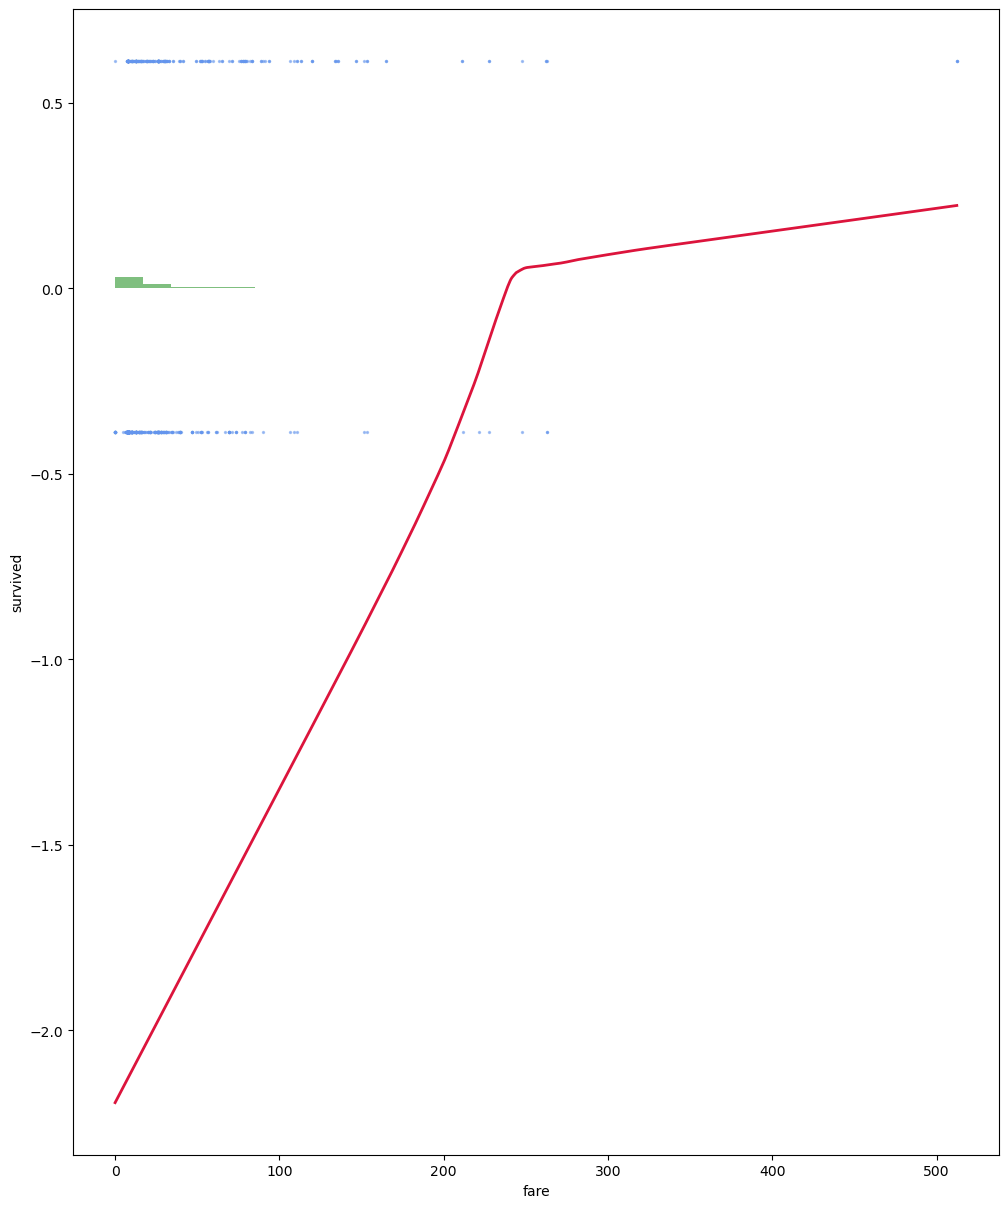

In [ ]:
model.plot()

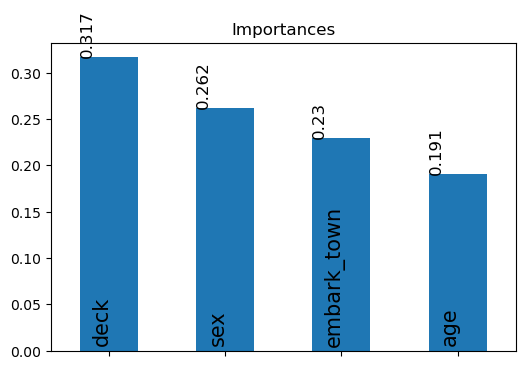

In [ ]:
model.plot_importances()

<Figure size 1200x400 with 0 Axes>

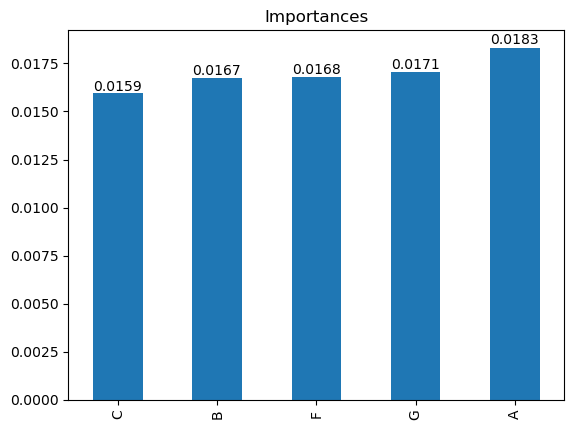

In [ ]:
model.plot_categorical_importances()

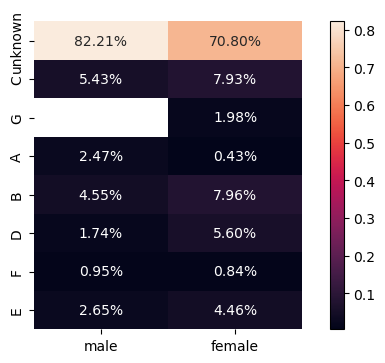

In [ ]:
model.plot_heatmap_importances("sex", "deck")

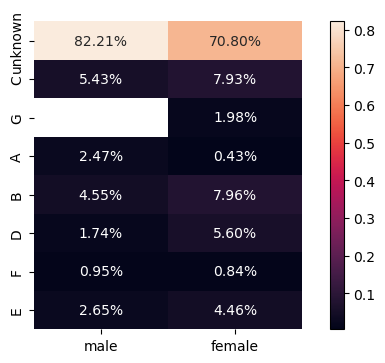

In [ ]:
model.plot_heatmap_importances("sex", "deck")

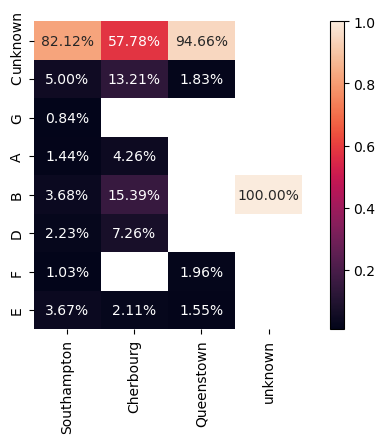

In [ ]:
model.plot_heatmap_importances("embark_town", "deck")

# test continuous feature interactions

In [ ]:
model = NATT(
    "survived ~  -1 + MLP(fare):MLP(age) + Transformer(sex):Transformer(deck):Transformer(embark_town)",
    data=TITANIC, 
    feature_dropout=0.0001)

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(
    optimizer = optimizer,
    loss = {"output": tf.keras.losses.BinaryCrossentropy(), "importances": None, "att_weights": None},
    metrics= {"output": [tf.keras.metrics.AUC(name="PR AUC", curve='PR'), "accuracy"], "importances": None, "att_weights": None},)

history = model.fit(
    model.training_dataset, 
    epochs=30, 
    validation_data=model.validation_dataset,
    verbose=1
)

Epoch 1/30
1/1 [==============================] - 17s 17s/step - loss: 0.8287 - output_loss: 0.8287 - output_PR AUC: 0.3849 - output_accuracy: 0.3865 - val_loss: 0.6251 - val_output_loss: 0.6251 - val_output_PR AUC: 0.6855 - val_output_accuracy: 0.6720
Epoch 2/30
1/1 [==============================] - 0s 249ms/step - loss: 0.6759 - output_loss: 0.6759 - output_PR AUC: 0.4666 - output_accuracy: 0.5797 - val_loss: 0.6190 - val_output_loss: 0.6190 - val_output_PR AUC: 0.7126 - val_output_accuracy: 0.6240
Epoch 3/30
1/1 [==============================] - 0s 221ms/step - loss: 0.6310 - output_loss: 0.6310 - output_PR AUC: 0.5550 - output_accuracy: 0.6235 - val_loss: 0.5642 - val_output_loss: 0.5642 - val_output_PR AUC: 0.7686 - val_output_accuracy: 0.6640
Epoch 4/30
1/1 [==============================] - 0s 213ms/step - loss: 0.5950 - output_loss: 0.5950 - output_PR AUC: 0.6089 - output_accuracy: 0.6833 - val_loss: 0.5738 - val_output_loss: 0.5738 - val_output_PR AUC: 0.7628 - val_output_ac

In [ ]:
model.feature_nets

ListWrapper([<keras.src.engine.functional.Functional object at 0x000001714BBD1150>])

100/100 [==============================] - 0s 1ms/step


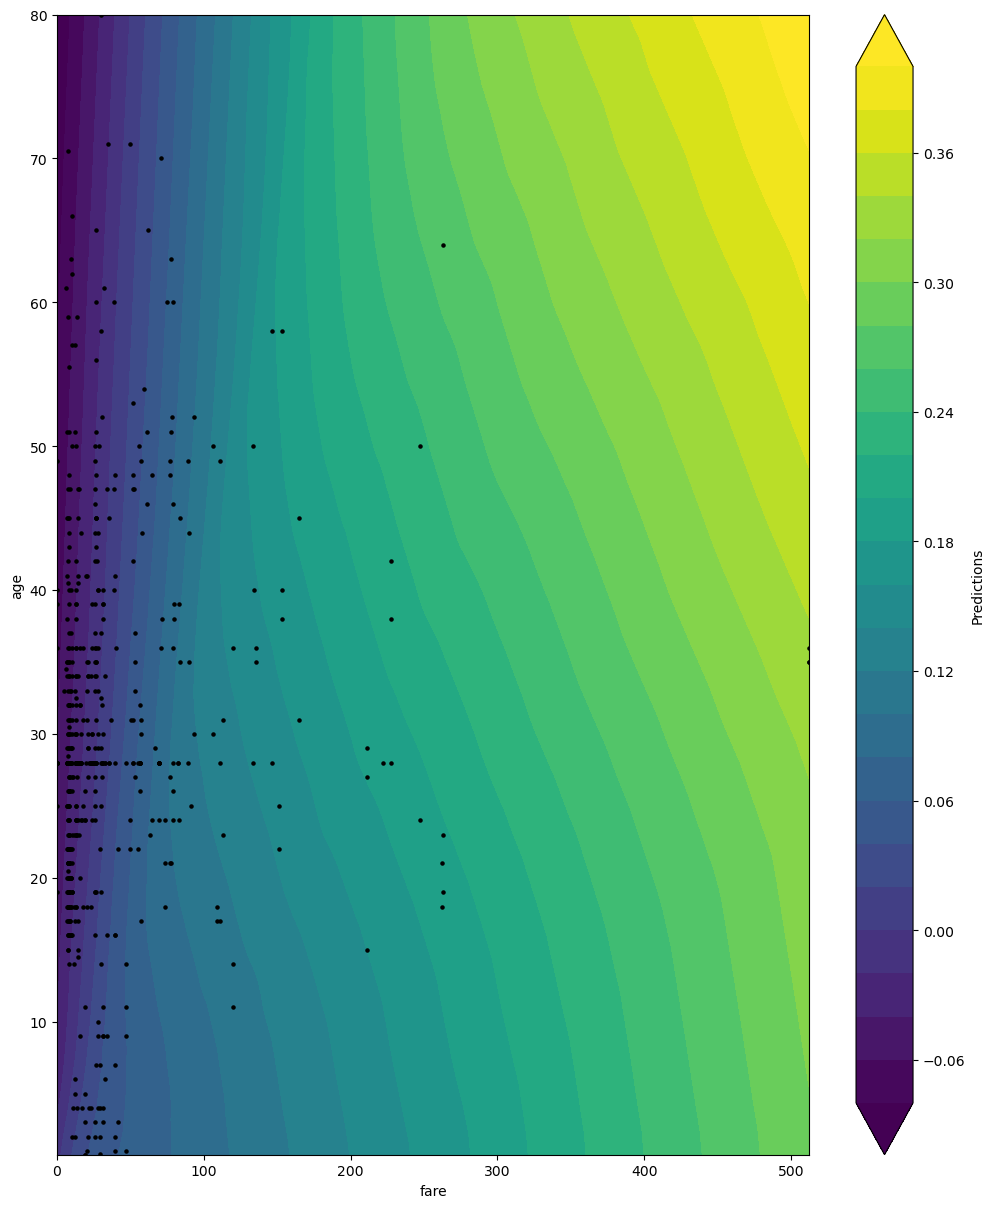

In [ ]:
model.plot()